# Part 1 - Data collection

### 1.1) Explore information sources and compile the seed gene list

We downloaded from DisGeNet Dataset Precancerous Conditions CURATED Gene-Disease Associations list (CUI: C0032927). Then, we removed all the microRNAs involved in the disease. Finally, we built seed gene table (1.1.b&c DisGeNet dataset), after checking for errors.

### 1.2) Collect interaction data

##### 1.2.a&b) Biogrid Human

In [1]:
import pandas as pd
import numpy as np

In [2]:
#read seed gene list
seedgene = pd.read_excel("1.1.b&c DisGeNet dataset.xlsx")
seedgene.head()

,gene symbol,Uniprot AC,protein name,Entrez Gene ID,brief description
0,PTGS2,P35354,prostaglandin-endoperoxide synthase 2,5743,Converts arachidonate to prostaglandin H2 (PGH...
1,CDKN2A,P42771,cyclin dependent kinase inhibitor 2A,1029,Acts as a negative regulator of the proliferat...
2,CCND1,P24385,cyclin D1,595,Regulatory component of the cyclin D1-CDK4 (DC...
3,VEGFA,P15692,vascular endothelial growth factor A,7422,"Growth factor active in angiogenesis, vasculog..."
4,HRAS,P01112,"HRas proto-oncogene, GTPase",3265,Involved in the activation of Ras protein sign...


In [3]:
#info seed gene list
seedgene.shape

(86, 5)

In [4]:
#read biogrid interaction data
biogrid = pd.read_csv("BIOGRID-ORGANISM-Homo_sapiens-3.5.180.tab2.txt", sep='\t', dtype = 'unicode')
biogrid.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,9006895,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,11309420,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,8599089,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,10938104,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,10875894,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID


In [5]:
#info biogrid interaction data
print(biogrid.columns)
print(biogrid.shape)

Index(['#BioGRID Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Pubmed ID',
       'Organism Interactor A', 'Organism Interactor B', 'Throughput', 'Score',
       'Modification', 'Phenotypes', 'Qualifications', 'Tags',
       'Source Database'],
      dtype='object')
(526283, 24)


In [6]:
#consider only physical interaction in Experimental System Type column
biogrid = biogrid[biogrid['Experimental System Type'].str.contains('physical')]

In [7]:
#check the previous step
(biogrid['Experimental System Type']!='physical').any()

False

In [8]:
#info biogrid interaction data
biogrid.shape

(517302, 24)

In [9]:
#consider only human-human (9606-9606) interactions in Organism Interactor A and Organism Interactor B columns 
biogrid = biogrid[(biogrid['Organism Interactor A'] == '9606') & (biogrid['Organism Interactor B'] == '9606')]

In [10]:
#check the previous step
print((biogrid['Organism Interactor A'] != '9606').any())
print((biogrid['Organism Interactor B'] != '9606').any())

False
False


In [11]:
#info biogrid interaction data
biogrid.shape

(484751, 24)

In [12]:
#list of the proteins interacting with at least one seed gene
df1 = biogrid[(biogrid['Official Symbol Interactor A'].isin(seedgene['gene symbol'])) | (biogrid['Official Symbol Interactor B'].isin(seedgene['gene symbol']))]
df1.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,10875894,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
83,5818,79039,2099,122503,108403,-,RP1-130E4.1,DDX54,ESR1,DP97,...,12466272,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
129,7682,8100,7916,113771,113646,RP11-172H24.2,DADB-70P7.5,IFT88,PRRC2A,D13S1056E|DAF19|TG737|TTC10|hTg737,...,14667819,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
139,8485,3480,3667,109701,109874,-,-,IGF1R,IRS1,CD221|IGFIR|IGFR|JTK13,...,7559507,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
142,8570,5747,3667,111719,109874,-,-,PTK2,IRS1,FADK|FAK|FAK1|FRNK|PPP1R71|p125FAK|pp125FAK,...,9822703,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID


In [13]:
#not seed genes that interact with at least one seed gene in Official Symbol Interactor A column 
df2 = df1['Official Symbol Interactor A'][(~df1['Official Symbol Interactor A'].isin(seedgene['gene symbol']))]

In [14]:
#not seed genes that interact with at least one seed gene in Official Symbol Interactor B column 
df3 = df1['Official Symbol Interactor B'][(~df1['Official Symbol Interactor B'].isin(seedgene['gene symbol']))]

In [15]:
#list of all not seed genes that interact with at least one seed gene
df4 = df2.append(df3)
df4 = pd.DataFrame(df4)
df4.columns = ['not seed genes'] #rename column
df4 = df4.drop_duplicates(subset=['not seed genes']) #drop duplicates

In [16]:
#list of interactions among not seed genes that interact with at least one seed gene
df5 = biogrid[(biogrid['Official Symbol Interactor A'].isin(df4['not seed genes'])) & (biogrid['Official Symbol Interactor B'].isin(df4['not seed genes']))]
df5.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,9006895,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,10938104,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
6,612,377,23647,106872,117174,-,-,ARF3,ARFIP2,-,...,9038142,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
7,617,377,27236,106872,118084,-,-,ARF3,ARFIP1,-,...,9038142,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
8,663,54464,226,119970,106728,-,-,XRN1,ALDOA,SEP1,...,15231747,9606,9606,High Throughput,-,-,-,-,-,BIOGRID


In [17]:
biogrid_output = df1.append(df5)
biogrid_output.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,10875894,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
83,5818,79039,2099,122503,108403,-,RP1-130E4.1,DDX54,ESR1,DP97,...,12466272,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
129,7682,8100,7916,113771,113646,RP11-172H24.2,DADB-70P7.5,IFT88,PRRC2A,D13S1056E|DAF19|TG737|TTC10|hTg737,...,14667819,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
139,8485,3480,3667,109701,109874,-,-,IGF1R,IRS1,CD221|IGFIR|IGFR|JTK13,...,7559507,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
142,8570,5747,3667,111719,109874,-,-,PTK2,IRS1,FADK|FAK|FAK1|FRNK|PPP1R71|p125FAK|pp125FAK,...,9822703,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID


In [18]:
#info biogrid_output
biogrid_output.shape

(212465, 24)

In [19]:
#save in excel format the biogrid output (WITH DUPLICATES) !!IMPORTANT: remove the # to save the below file!!

#biogrid_output.to_excel("biogrid_output_with_duplicates.xlsx", index = None, header=True)

##### 1.2.a&b) IID Integrated Interactions Database

In [20]:
#read IID interaction data
iid = pd.read_csv('human_annotated_PPIs.txt.gz', compression='gzip', header=0, sep='\t', error_bad_lines=False)
iid.head()

,uniprot1,uniprot2,symbol1,symbol2,methods,pmids,dbs,evidence type,adipose tissue,adrenal gland,...,arteriosclerosis,lymphocytic leukemia,enzymes,ion channels,receptors,transporters,drug targets,targeting drugs,orthologs are drug targets,drugs targeting orthologs
0,Q9NUX5,Q9NVM4,POT1,PRMT7,bimolecular fluorescence complementation;two h...,21044950,biogrid;intact,exp,0,0,...,0,0,1,0,0,0,0,-,0,-
1,Q96JY6,Q9NPC6,PDLIM2,MYOZ2,-,21836163,iid-pred,pred,0,1,...,0,0,0,0,0,0,0,-,0,-
2,Q15414,Q32P51,-,HNRNPA1L2,-,23023127,iid-pred,pred,?,?,...,0,0,0,0,0,0,0,-,0,-
3,P62633,Q99729,CNBP,HNRNPAB,affinity chromatography technology;anti bait c...,17353931,biogrid;intact,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
4,P29353,P42685,SHC1,FRK,-,25402006,iid-pred,pred,0,0,...,0,0,1,0,0,0,1,Dasatinib;Regorafenib,0,-


In [21]:
#info IID interaction data
iid.shape

(975877, 253)

In [22]:
#consider only experimental data (exp/exp;ortho/exp;ortho;pred) in evidence type column
iid = iid[iid['evidence type'].str.contains("exp")]
iid.head()

,uniprot1,uniprot2,symbol1,symbol2,methods,pmids,dbs,evidence type,adipose tissue,adrenal gland,...,arteriosclerosis,lymphocytic leukemia,enzymes,ion channels,receptors,transporters,drug targets,targeting drugs,orthologs are drug targets,drugs targeting orthologs
0,Q9NUX5,Q9NVM4,POT1,PRMT7,bimolecular fluorescence complementation;two h...,21044950,biogrid;intact,exp,0,0,...,0,0,1,0,0,0,0,-,0,-
3,P62633,Q99729,CNBP,HNRNPAB,affinity chromatography technology;anti bait c...,17353931,biogrid;intact,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
6,O43715,O95817,TRIAP1,BAG3,affinity chromatography technology,23824909,biogrid,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
7,Q13285,Q9UKM9,NR5A1,RALY,anti tag coimmunoprecipitation,24635384,intact,exp,0,1,...,0,0,0,0,1,0,1,"(2R)-3-{[{[(2S)-2,3-DIHYDROXYPROPYL]OXY}(HYDRO...",0,-
9,P60174,Q9H0W5,TPI1,CCDC8,affinity chromatography technology,24711643,biogrid,exp,1,1,...,0,0,1,0,0,0,1,[2(Formyl-Hydroxy-Amino)-Ethyl]-Phosphonic Aci...,0,-


In [23]:
#info IID interaction data
iid.shape

(334315, 253)

In [24]:
#list of the proteins interacting with at least one seed gene
tf1 = iid[(iid['symbol1'].isin(seedgene['gene symbol'])) | (iid['symbol2'].isin(seedgene['gene symbol']))]
tf1.head()

,uniprot1,uniprot2,symbol1,symbol2,methods,pmids,dbs,evidence type,adipose tissue,adrenal gland,...,arteriosclerosis,lymphocytic leukemia,enzymes,ion channels,receptors,transporters,drug targets,targeting drugs,orthologs are drug targets,drugs targeting orthologs
151,P06400,P52757,RB1,CHN2,two hybrid;two hybrid array,25814554,biogrid;intact,exp,1,1,...,0,0,0,0,0,0,1,Insulin Human;Insulin Pork,0,-
262,P35232,Q00610,PHB,CLTC,biochemical,26344197,biogrid,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
304,O95070,Q92542,YIF1A,NCSTN,affinity chromatography technology;anti tag co...,26496610,biogrid;intact,exp,1,1,...,0,0,1,0,0,0,0,-,0,-
347,O60506,P35232,SYNCRIP,PHB,biochemical,22939629,biogrid,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
532,O00515,P12830,LAD1,CDH1,bioid,25468996,biogrid,exp,1,0,...,0,0,0,0,0,0,0,-,0,-


In [25]:
#not seed genes that interact with at least one seed gene in symbol1 column 
tf2 = tf1['symbol1'][(~tf1['symbol1'].isin(seedgene['gene symbol']))]

In [26]:
#not seed genes that interact with at least one seed gene in symbol2 column 
tf3 = tf1['symbol2'][(~tf1['symbol2'].isin(seedgene['gene symbol']))]

In [27]:
#list of all not seed genes that interact with at least one seed gene
tf4 = tf2.append(tf3)
tf4 = pd.DataFrame(tf4)
tf4.columns = ['not seed genes'] #rename column
tf4 = tf4.drop_duplicates(subset=['not seed genes']) #drop duplicates

In [28]:
#list of interactions among not seed genes that interact with at least one seed gene
tf5 = iid[(iid['symbol1'].isin(tf4['not seed genes'])) & (iid['symbol2'].isin(tf4['not seed genes']))]
tf5.head()

,uniprot1,uniprot2,symbol1,symbol2,methods,pmids,dbs,evidence type,adipose tissue,adrenal gland,...,arteriosclerosis,lymphocytic leukemia,enzymes,ion channels,receptors,transporters,drug targets,targeting drugs,orthologs are drug targets,drugs targeting orthologs
9,P60174,Q9H0W5,TPI1,CCDC8,affinity chromatography technology,24711643,biogrid,exp,1,1,...,0,0,1,0,0,0,1,[2(Formyl-Hydroxy-Amino)-Ethyl]-Phosphonic Aci...,0,-
11,P11388,Q9H0W5,TOP2A,CCDC8,affinity chromatography technology,24711643,biogrid,exp,0,0,...,0,0,1,0,0,0,1,Dactinomycin,0,-
18,P24539,Q99816,ATP5F1,TSG101,two hybrid,19549727,intact,exp,1,1,...,0,0,0,0,0,1,0,-,0,-
31,Q06609,Q06609,RAD51,RAD51,affinity chromatography technology;coimmunopre...,10851248;12442171;14580352;17515903;17515904;1...,biogrid;dip;hprd;iid-ortho;intact,exp;ortho,0,0,...,0,1,1,0,0,0,1,Amuvatinib;Phosphoaminophosphonic Acid-Adenyla...,0,-
35,P13639,P31943,EEF2,HNRNPH1,biochemical,22939629,biogrid,exp,1,1,...,0,0,1,0,0,0,1,Adenosine-5-Diphosphoribose;Diphthamide;Guanos...,0,-


In [29]:
iid_output = tf1.append(tf5)
iid_output.head()

,uniprot1,uniprot2,symbol1,symbol2,methods,pmids,dbs,evidence type,adipose tissue,adrenal gland,...,arteriosclerosis,lymphocytic leukemia,enzymes,ion channels,receptors,transporters,drug targets,targeting drugs,orthologs are drug targets,drugs targeting orthologs
151,P06400,P52757,RB1,CHN2,two hybrid;two hybrid array,25814554,biogrid;intact,exp,1,1,...,0,0,0,0,0,0,1,Insulin Human;Insulin Pork,0,-
262,P35232,Q00610,PHB,CLTC,biochemical,26344197,biogrid,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
304,O95070,Q92542,YIF1A,NCSTN,affinity chromatography technology;anti tag co...,26496610,biogrid;intact,exp,1,1,...,0,0,1,0,0,0,0,-,0,-
347,O60506,P35232,SYNCRIP,PHB,biochemical,22939629,biogrid,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
532,O00515,P12830,LAD1,CDH1,bioid,25468996,biogrid,exp,1,0,...,0,0,0,0,0,0,0,-,0,-


In [30]:
#info iid_output
iid_output.shape

(107893, 253)

In [31]:
#save in excel format the iid output (WITH DUPLICATES) !!IMPORTANT: remove the # to save the below file!!

#iid_output.to_excel("iid_output_with_duplicates.xlsx", index = None, header=True)

###### Remove duplicates

In [32]:
#check if duplicates and reversed duplicates (e.g. A-B, A-B, B-A) in biogrid output list are present
biogrid_output[pd.DataFrame(np.sort(biogrid_output[['Official Symbol Interactor A','Official Symbol Interactor B']], axis=1)).duplicated().values].shape[0]

66382

In [33]:
#check if duplicates and reversed duplicates (e.g. A-B, A-B, B-A) in IID output list are present
iid_output[pd.DataFrame(np.sort(iid_output[['symbol1','symbol2']], axis=1)).duplicated().values].shape[0]

1849

In [34]:
#remove duplicates and reversed duplicates in biogrid output list
biogrid_results = biogrid_output[~pd.DataFrame(np.sort(biogrid_output[['Official Symbol Interactor A','Official Symbol Interactor B']], axis=1)).duplicated().values]
biogrid_results.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,10875894,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
83,5818,79039,2099,122503,108403,-,RP1-130E4.1,DDX54,ESR1,DP97,...,12466272,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
129,7682,8100,7916,113771,113646,RP11-172H24.2,DADB-70P7.5,IFT88,PRRC2A,D13S1056E|DAF19|TG737|TTC10|hTg737,...,14667819,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
139,8485,3480,3667,109701,109874,-,-,IGF1R,IRS1,CD221|IGFIR|IGFR|JTK13,...,7559507,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
142,8570,5747,3667,111719,109874,-,-,PTK2,IRS1,FADK|FAK|FAK1|FRNK|PPP1R71|p125FAK|pp125FAK,...,9822703,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID


In [35]:
#info biogrid results list
biogrid_results.shape

(146083, 24)

In [36]:
#save in excel format the biogrid results (WITHOUT DUPLICATES) !!IMPORTANT: remove the # to save the below file!!

#biogrid_results.to_excel("1.2.a&b biogrid results.xlsx", index = None, header=True)

In [37]:
#remove duplicates and reversed duplicates in iid output list
iid_results = iid_output[~pd.DataFrame(np.sort(iid_output[['symbol1','symbol2']], axis=1)).duplicated().values]
iid_results.head()

,uniprot1,uniprot2,symbol1,symbol2,methods,pmids,dbs,evidence type,adipose tissue,adrenal gland,...,arteriosclerosis,lymphocytic leukemia,enzymes,ion channels,receptors,transporters,drug targets,targeting drugs,orthologs are drug targets,drugs targeting orthologs
151,P06400,P52757,RB1,CHN2,two hybrid;two hybrid array,25814554,biogrid;intact,exp,1,1,...,0,0,0,0,0,0,1,Insulin Human;Insulin Pork,0,-
262,P35232,Q00610,PHB,CLTC,biochemical,26344197,biogrid,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
304,O95070,Q92542,YIF1A,NCSTN,affinity chromatography technology;anti tag co...,26496610,biogrid;intact,exp,1,1,...,0,0,1,0,0,0,0,-,0,-
347,O60506,P35232,SYNCRIP,PHB,biochemical,22939629,biogrid,exp,1,1,...,0,0,0,0,0,0,0,-,0,-
532,O00515,P12830,LAD1,CDH1,bioid,25468996,biogrid,exp,1,0,...,0,0,0,0,0,0,0,-,0,-


In [38]:
#info iid results list
iid_results.shape

(106044, 253)

In [39]:
#save in excel format the iid results (WITHOUT DUPLICATES) !!IMPORTANT: remove the # to save the below file!!

#iid_results.to_excel("1.2.a&b iid results.xlsx", index = None, header=True)

##### 1.2.c) Summarize the main results in a table 

a) n° of seed genes found in each different DBs (some seed genes may be missing in the DBs)

In [40]:
#list of all the seed genes
list_seedgene = seedgene['gene symbol'].tolist()

In [41]:
#count n° of seed genes
def n_seedgenes(dataframe, listvalues):
    resultdict = {}
    # Iterate over the list of elements one by one
    for i in listvalues:
        # Check if the element exists in dataframe values
        if i in dataframe.values:
            resultdict[i] = True
        else:
            pass
    # Returns a dictionary of values & the length       
    return len(resultdict.keys())

In [42]:
#count n° of seed genes in biogrid results table
seedgene_biogrid = n_seedgenes(biogrid_results, list_seedgene)
seedgene_biogrid

81

In [43]:
#count n° of seed genes in iid results table
seedgene_iid = n_seedgenes(iid_results, list_seedgene)
seedgene_iid

82

In [44]:
n_seedgene = pd.DataFrame([(seedgene_biogrid, seedgene_iid)], index=['n° of seed genes'], columns=['Biogrid', 'IID'])
n_seedgene

,Biogrid,IID
n° of seed genes,81,82


b) total n° of interacting proteins, including seed genes, for each DB

In [45]:
#count total n° of interacting proteins in biogrid results table
interacting_proteins_biogrid = len(pd.unique(biogrid_results[['Official Symbol Interactor A', 'Official Symbol Interactor B']].values.ravel()))
interacting_proteins_biogrid

4464

In [46]:
#count total n° of interacting proteins in iid results table
interacting_proteins_iid = len(pd.unique(iid_results[['symbol1', 'symbol2']].values.ravel()))
interacting_proteins_iid

3887

In [47]:
n_interacting_proteins = pd.DataFrame([(interacting_proteins_biogrid, interacting_proteins_iid)], index=['n° of interacting proteins'], columns=['Biogrid', 'IID'])
n_interacting_proteins

,Biogrid,IID
n° of interacting proteins,4464,3887


c) total n° of interactions found in each DB

In [48]:
#count total n° of interactions in biogrid results table
interactions_biogrid = biogrid_results.shape[0]
interactions_biogrid

146083

In [49]:
#count total n° of interactions in iid results table
interactions_iid = iid_results.shape[0]
interactions_iid

106044

In [50]:
n_interactions = pd.DataFrame([(interactions_biogrid, interactions_iid)], index=['n° of interactions'], columns=['Biogrid', 'IID'])
n_interactions

,Biogrid,IID
n° of interactions,146083,106044


In [51]:
table_summary = n_seedgene.append([n_interacting_proteins, n_interactions])
table_summary

,Biogrid,IID
n° of seed genes,81,82
n° of interacting proteins,4464,3887
n° of interactions,146083,106044


In [52]:
#save in excel format the table summary !!IMPORTANT: remove the # to save the below file!!

#table_summary.to_excel("1.2.c table summary.xlsx", header=True)

### 1.3) Arrange interaction data

In point 1.3, we have to build three tables specifying the Uniprot AC for each gene symbol. But, in the 'biogrid_results' dataframe, the Uniprot ACs are not present. So, we decided to build a list of all human Uniprot ACs and their respective gene symbols from the 'human_annotated_PPIs' database, in which we have all these information. For gene symbols without Uniprot AC, we added it manually.

In [53]:
#create a copy of iid dataframe
uniprotAC = iid.copy()

In [54]:
#info uniprotAC 
uniprotAC.shape

(334315, 253)

In [55]:
#select 'symbol1' and 'uniprot1' columns
uniprotAC_c1 = uniprotAC[['symbol1', 'uniprot1']] #select only 'symbol1' and 'uniprot1' columns
uniprotAC_c1.columns = ['gene', 'uniprot'] #rename columns 

In [56]:
#select 'symbol2' and 'uniprot2' columns
uniprotAC_c2 = uniprotAC[['symbol2', 'uniprot2']] #select only 'symbol2' and 'uniprot2' columns
uniprotAC_c2.columns = ['gene', 'uniprot'] #rename columns 

In [57]:
#append uniprotAC_c2 to uniprotAC_c1
uniprotAC = uniprotAC_c1.append(uniprotAC_c2)

In [58]:
#info uniprotAC 
uniprotAC.shape

(668630, 2)

In [59]:
#drop duplicates
uniprotAC = uniprotAC.drop_duplicates(subset=['gene', 'uniprot'])
uniprotAC.head()

,gene,uniprot
0,POT1,Q9NUX5
3,CNBP,P62633
6,TRIAP1,O43715
7,NR5A1,Q13285
9,TPI1,P60174


In [60]:
#info uniprotAC 
uniprotAC.shape

(17776, 2)

Some gene symbols can have more than one Uniprot AC. This is because some Uniprot AC are not reviewed Swissprot data. So, we have to collect only the gene symbol and its respective reviewed Uniprot AC.

In [61]:
#check if different Uniprot ACs for the same gene symbol are present 
different_uniprotAC = uniprotAC[uniprotAC.duplicated(['gene'], keep=False)]

In [62]:
#info different_uniprotAC 
different_uniprotAC.shape

(407, 2)

In [63]:
#list of all the genes that have more than one Uniprot AC (without duplicates)
list_different_uniprotAC = different_uniprotAC['gene'].tolist() #convert to list
list_different_uniprotAC = list(dict.fromkeys(list_different_uniprotAC)) #drop duplicates
list_different_uniprotAC

['BRCA1',
 'EEF2',
 'MYC',
 'RPS27A',
 'ILF3',
 'TMPO',
 'HNF4G',
 'MOCS2',
 'UBE3A',
 'RABGAP1L',
 'FHL2',
 'HLA-C',
 'DMD',
 'RPS3A',
 'RTL8C',
 'FN1',
 'MET',
 'dystrophin',
 'TIMM50',
 'GNAS',
 'RPSA',
 'CFTR',
 'NRXN1',
 'BRD1',
 'HLA-B',
 'NOTCH1',
 'HLA-A',
 'SRI',
 'TSHR',
 'PML',
 'ITGB4',
 'HBB',
 'LMNA',
 'MAP4',
 'TJP1',
 'FGFR3',
 'HLA-DRB1',
 'CDKN2A',
 'PRNP',
 'NUP98',
 'NACA',
 'TOP2B',
 'MYO1B',
 'STAT3',
 'ACAN',
 'DDX27',
 'FAU',
 'ARNT',
 'CASC4',
 'BCR/ABL fusion',
 'MYLK',
 'POLR1D',
 'CDC37',
 'LST1',
 'PTMA',
 'Uncharacterized protein',
 'ITGB3',
 'MECOM',
 'CHTF8',
 'TOR1AIP2',
 'DUSP13',
 'RAB34',
 'CDK5',
 'CCDC88A',
 'AKAP7',
 'SYT-SSX1',
 'EPN2',
 'EPM2A',
 'DISC1',
 'SLC35E1',
 'Tubulin beta chain',
 'SYT-SSX2',
 'SNRPB',
 'CUX1',
 'C12orf10',
 'ARHGEF7',
 'C19orf2',
 'HLA-DRB3',
 'HLA-DQB1',
 'ZFP64',
 'PTPN20',
 'NRXN3',
 'PKP4',
 'Integrin beta',
 'ORMDL3',
 'IL10',
 'IGL@',
 'HLA-DMA',
 'CHN1',
 'TCL6',
 'CALCA',
 'KIAA0232',
 'ZNF365',
 'RPP21',
 'RA

In [64]:
#list of all the possible genes that have more than one Uniprot AC in a specific dataframe
def n_different_uniprotAC(dataframe, listvalues):
    resultdict = {}
    # Iterate over the list of elements one by one
    for i in listvalues:
        # Check if the element exists in dataframe values
        if i in dataframe.values:
            resultdict[i] = True
        else:
            pass
    # Returns a dictionary of values      
    return resultdict.keys()

##### 1.3.a) Seed genes interactome: interactions that involve seed genes only, from all DBs

In [65]:
#consider interactions that involve seed genes only from biogrid results table
sgi_biogrid = biogrid_results[(biogrid_results['Official Symbol Interactor A'].isin(seedgene['gene symbol'])) & (biogrid_results['Official Symbol Interactor B'].isin(seedgene['gene symbol']))]
sgi_biogrid = sgi_biogrid[['Official Symbol Interactor A', 'Official Symbol Interactor B', 'Source Database']]
sgi_biogrid.columns = ['interactor A gene symbol', 'interactor B gene symbol', 'database source']
sgi_biogrid.head()

,interactor A gene symbol,interactor B gene symbol,database source
143,MAPK8,IRS1,BIOGRID
3897,ACY1,ACY1,BIOGRID
4046,GSTA4,GSTA4,BIOGRID
7408,ABL1,ABL1,BIOGRID
7759,CDH1,CDH1,BIOGRID


In [66]:
#info seed genes interactome from biogrid results table
sgi_biogrid.shape

(100, 3)

In [67]:
#consider interactions that involve seed genes only from iid results table
sgi_iid = iid_results[(iid_results['symbol1'].isin(seedgene['gene symbol'])) & (iid_results['symbol2'].isin(seedgene['gene symbol']))]
sgi_iid = sgi_iid[['symbol1', 'symbol2']]
sgi_iid = sgi_iid.assign(Dataset='IID')
sgi_iid.columns = ['interactor A gene symbol', 'interactor B gene symbol', 'database source']
sgi_iid.head()

,interactor A gene symbol,interactor B gene symbol,database source
1618,ANXA4,CDH1,IID
11404,CCND1,STAT3,IID
20197,VEGFA,AKT1,IID
20843,IL6,IL6,IID
53204,CDH1,SIRPA,IID


In [68]:
#info seed genes interactome from iid results table
sgi_iid.shape

(116, 3)

In [69]:
#assign both database sources (BIOGRID; IID) to interactions that are both in Biogrid and in IID
sgi = sgi_biogrid.append(sgi_iid) #append sgi_iid to sgi_biogrid
sgi_not_duplicates = sgi[~pd.DataFrame(np.sort(sgi[['interactor A gene symbol', 'interactor B gene symbol']], axis=1)).duplicated(keep=False).values] #all not duplicates
sgi_duplicates = sgi[pd.DataFrame(np.sort(sgi[['interactor A gene symbol', 'interactor B gene symbol']], axis=1)).duplicated(keep=False).values] #all duplicates
sgi_duplicates2 = sgi_duplicates.copy()
sgi_duplicates2['database source'] = 'BIOGRID; IID' #rename values
sgi = sgi_not_duplicates.append(sgi_duplicates2) #append sgi_duplicates2 to sgi_not_duplicates

In [70]:
#remove duplicates and reversed duplicates in sgi table
sgi = sgi[~pd.DataFrame(np.sort(sgi[['interactor A gene symbol', 'interactor B gene symbol']], axis=1)).duplicated().values]
sgi.head()

,interactor A gene symbol,interactor B gene symbol,database source
419235,MDM2,VEGFA,BIOGRID
428155,CDKN2A,CDKN2A,BIOGRID
431832,CDKN2A,AKT1,BIOGRID
496962,SIRPA,AKT1,BIOGRID
496980,SIRPA,FTH1,BIOGRID


In [71]:
#info seed genes interactome from all DBs
sgi.shape

(135, 3)

Add 'interactor A Uniprot AC' and 'interactor B Uniprot AC' columns in SGI table.

In [72]:
#list of all the genes that have more than one Uniprot AC in SGI dataframe
different_uniprotAC_SGI = n_different_uniprotAC(sgi, list_different_uniprotAC)
different_uniprotAC_SGI

dict_keys(['CDKN2A', 'STAT3'])

In [73]:
#insert the exact Uniprot AC for CDKN2A and STAT3 genes checking from Uniprot website
uniprotAC2 = uniprotAC.copy()
uniprotAC2.loc[uniprotAC2['gene'] == 'CDKN2A', 'uniprot'] = 'P42771'
uniprotAC2.loc[uniprotAC2['gene'] == 'STAT3', 'uniprot'] = 'P40763'

In [74]:
#drop CDKN2A and STAT3 genes duplicates in uniprotAC table
uniprotAC = uniprotAC2.drop_duplicates(subset=['gene', 'uniprot'])

In [75]:
#Add 'interactor A Uniprot AC' and 'interactor B Uniprot AC' columns in SGI table
sgi = sgi.reset_index(drop=True) #reset index of SGI table
sgi = sgi.assign(uniprot_A=sgi.merge(uniprotAC,left_on='interactor A gene symbol',right_on='gene', how='left').uniprot, uniprot_B=sgi.merge(uniprotAC,left_on='interactor B gene symbol',right_on='gene', how='left').uniprot)
sgi.rename(columns={'uniprot_A':'interactor A Uniprot AC', 'uniprot_B':'interactor B Uniprot AC'}, inplace=True) #rename columns
sgi = sgi[['interactor A gene symbol', 'interactor B gene symbol', 'interactor A Uniprot AC', 'interactor B Uniprot AC', 'database source']] #rearrange columns
sgi.head()

,interactor A gene symbol,interactor B gene symbol,interactor A Uniprot AC,interactor B Uniprot AC,database source
0,MDM2,VEGFA,Q00987,P15692,BIOGRID
1,CDKN2A,CDKN2A,P42771,P42771,BIOGRID
2,CDKN2A,AKT1,P42771,P31749,BIOGRID
3,SIRPA,AKT1,P78324,P31749,BIOGRID
4,SIRPA,FTH1,P78324,P02794,BIOGRID


In [76]:
#check if NaN values in interactor A Uniprot AC and interactor B Uniprot AC columns are present
print(sgi.isnull().any())

interactor A gene symbol    False
interactor B gene symbol    False
interactor A Uniprot AC     False
interactor B Uniprot AC     False
database source             False
dtype: bool


In [77]:
#info seed genes interactome from all DBs
sgi.shape

(135, 5)

In [78]:
#save in excel format the SGI table !!IMPORTANT: remove the # to save the below file!!

#sgi.to_excel("1.3.a SGI.xlsx", index = None, header=True)

##### 1.3.b) Union interactome: all proteins interacting with at least one seed gene, from all DBs

In [79]:
#consider proteins interacting with at least one seed gene from biogrid results table (e.g. seed-seed; seed-notseed; notseed-notseed)
u_biogrid = biogrid_results.copy()
u_biogrid = u_biogrid[['Official Symbol Interactor A', 'Official Symbol Interactor B', 'Source Database']]
u_biogrid.columns = ['interactor A gene symbol', 'interactor B gene symbol', 'database source']
u_biogrid.head()

,interactor A gene symbol,interactor B gene symbol,database source
4,RPA2,STAT3,BIOGRID
83,DDX54,ESR1,BIOGRID
129,IFT88,PRRC2A,BIOGRID
139,IGF1R,IRS1,BIOGRID
142,PTK2,IRS1,BIOGRID


In [80]:
#info union interactome from biogrid results table
u_biogrid.shape

(146083, 3)

In [81]:
#consider proteins interacting with at least one seed gene from iid results table (e.g. seed-seed; seed-notseed; notseed-notseed) 
u_iid = iid_results.copy()
u_iid = u_iid[['symbol1', 'symbol2']]
u_iid = u_iid.assign(Dataset='IID')
u_iid.columns = ['interactor A gene symbol', 'interactor B gene symbol', 'database source']
u_iid.head()

,interactor A gene symbol,interactor B gene symbol,database source
151,RB1,CHN2,IID
262,PHB,CLTC,IID
304,YIF1A,NCSTN,IID
347,SYNCRIP,PHB,IID
532,LAD1,CDH1,IID


In [82]:
#info union interactome from iid results table
u_iid.shape

(106044, 3)

In [83]:
#assign both database sources (BIOGRID; IID) to interactions that are both in Biogrid and in IID
u = u_biogrid.append(u_iid) #append u_iid to u_biogrid
u_not_duplicates = u[~pd.DataFrame(np.sort(u[['interactor A gene symbol', 'interactor B gene symbol']], axis=1)).duplicated(keep=False).values] #all not duplicates
u_duplicates = u[pd.DataFrame(np.sort(u[['interactor A gene symbol', 'interactor B gene symbol']], axis=1)).duplicated(keep=False).values] #all duplicates
u_duplicates2 = u_duplicates.copy()
u_duplicates2['database source'] = 'BIOGRID; IID' #rename values
u = u_not_duplicates.append(u_duplicates2) #append u_duplicates2 to u_not_duplicates

In [84]:
#remove duplicates and reversed duplicates in u table
u = u[~pd.DataFrame(np.sort(u[['interactor A gene symbol', 'interactor B gene symbol']], axis=1)).duplicated().values]
u.head()

,interactor A gene symbol,interactor B gene symbol,database source
4435,ZAK,MAP2K7,BIOGRID
17495,MAPK9,KIAA1377,BIOGRID
17767,ALDH2,C14orf1,BIOGRID
17855,GSTO1,KIAA1377,BIOGRID
20762,MAPK8,IKBKAP,BIOGRID


In [85]:
#info union interactome from all DBs
u.shape

(178809, 3)

Add 'interactor A Uniprot AC' and 'interactor B Uniprot AC' columns in U table.

In [86]:
#list of all the genes that have more than one Uniprot AC in U dataframe
different_uniprotAC_U = n_different_uniprotAC(u, list_different_uniprotAC)
different_uniprotAC_U

dict_keys(['BRCA1', 'EEF2', 'MYC', 'RPS27A', 'ILF3', 'TMPO', 'UBE3A', 'FHL2', 'HLA-C', 'DMD', 'RPS3A', 'RTL8C', 'FN1', 'MET', 'TIMM50', 'GNAS', 'RPSA', 'CFTR', 'HLA-B', 'NOTCH1', 'HLA-A', 'SRI', 'TSHR', 'PML', 'HBB', 'LMNA', 'MAP4', 'TJP1', 'FGFR3', 'CDKN2A', 'NUP98', 'NACA', 'MYO1B', 'STAT3', 'ARNT', 'MYLK', 'CDC37', 'PTMA', 'Uncharacterized protein', 'ITGB3', 'CHTF8', 'TOR1AIP2', 'DUSP13', 'RAB34', 'CDK5', 'CCDC88A', 'SYT-SSX1', 'EPN2', 'EPM2A', 'DISC1', 'SYT-SSX2', 'SNRPB', 'PKP4', 'IL10', 'CHN1', 'RPP21'])

In [87]:
#insert the exact Uniprot AC for the above genes checking from Uniprot website (except for CDKN2A and STAT3 genes, that have already been modified)
uniprotAC3 = uniprotAC.copy()
uniprotAC3.loc[uniprotAC3['gene'] == 'BRCA1', 'uniprot'] = 'P38398'
uniprotAC3.loc[uniprotAC3['gene'] == 'EEF2', 'uniprot'] = 'P13639'
uniprotAC3.loc[uniprotAC3['gene'] == 'MYC', 'uniprot'] = 'P01106'
uniprotAC3.loc[uniprotAC3['gene'] == 'RPS27A', 'uniprot'] = 'P62979'
uniprotAC3.loc[uniprotAC3['gene'] == 'ILF3', 'uniprot'] = 'Q12906'
uniprotAC3.loc[uniprotAC3['gene'] == 'TMPO', 'uniprot'] = 'P42166'
uniprotAC3.loc[uniprotAC3['gene'] == 'UBE3A', 'uniprot'] = 'Q05086'
uniprotAC3.loc[uniprotAC3['gene'] == 'FHL2', 'uniprot'] = 'Q14192'
uniprotAC3.loc[uniprotAC3['gene'] == 'HLA-C', 'uniprot'] = 'P10321'
uniprotAC3.loc[uniprotAC3['gene'] == 'DMD', 'uniprot'] = 'P11532'
uniprotAC3.loc[uniprotAC3['gene'] == 'RPS3A', 'uniprot'] = 'P61247'
uniprotAC3.loc[uniprotAC3['gene'] == 'RTL8C', 'uniprot'] = 'A6ZKI3'
uniprotAC3.loc[uniprotAC3['gene'] == 'FN1', 'uniprot'] = 'P02751'
uniprotAC3.loc[uniprotAC3['gene'] == 'MET', 'uniprot'] = 'P08581'
uniprotAC3.loc[uniprotAC3['gene'] == 'TIMM50', 'uniprot'] = 'Q3ZCQ8'
uniprotAC3.loc[uniprotAC3['gene'] == 'GNAS', 'uniprot'] = 'O95467'
uniprotAC3.loc[uniprotAC3['gene'] == 'RPSA', 'uniprot'] = 'P08865'
uniprotAC3.loc[uniprotAC3['gene'] == 'CFTR', 'uniprot'] = 'P13569'
uniprotAC3.loc[uniprotAC3['gene'] == 'HLA-B', 'uniprot'] = 'P01889'
uniprotAC3.loc[uniprotAC3['gene'] == 'NOTCH1', 'uniprot'] = 'P46531'
uniprotAC3.loc[uniprotAC3['gene'] == 'HLA-A', 'uniprot'] = 'P04439'
uniprotAC3.loc[uniprotAC3['gene'] == 'SRI', 'uniprot'] = 'P30626'
uniprotAC3.loc[uniprotAC3['gene'] == 'TSHR', 'uniprot'] = 'P16473'
uniprotAC3.loc[uniprotAC3['gene'] == 'PML', 'uniprot'] = 'P29590'
uniprotAC3.loc[uniprotAC3['gene'] == 'HBB', 'uniprot'] = 'P68871'
uniprotAC3.loc[uniprotAC3['gene'] == 'LMNA', 'uniprot'] = 'P02545'
uniprotAC3.loc[uniprotAC3['gene'] == 'MAP4', 'uniprot'] = 'P27816'
uniprotAC3.loc[uniprotAC3['gene'] == 'TJP1', 'uniprot'] = 'Q07157'
uniprotAC3.loc[uniprotAC3['gene'] == 'FGFR3', 'uniprot'] = 'P22607'
uniprotAC3.loc[uniprotAC3['gene'] == 'NUP98', 'uniprot'] = 'P52948'
uniprotAC3.loc[uniprotAC3['gene'] == 'NACA', 'uniprot'] = 'E9PAV3'
uniprotAC3.loc[uniprotAC3['gene'] == 'MYO1B', 'uniprot'] = 'O43795'
uniprotAC3.loc[uniprotAC3['gene'] == 'ARNT', 'uniprot'] = 'P27540'
uniprotAC3.loc[uniprotAC3['gene'] == 'MYLK', 'uniprot'] = 'Q15746'
uniprotAC3.loc[uniprotAC3['gene'] == 'CDC37', 'uniprot'] = 'Q16543'
uniprotAC3.loc[uniprotAC3['gene'] == 'PTMA', 'uniprot'] = 'P06454'
uniprotAC3.loc[uniprotAC3['gene'] == 'ITGB3', 'uniprot'] = 'P05106'
uniprotAC3.loc[uniprotAC3['gene'] == 'CHTF8', 'uniprot'] = 'P0CG13'
uniprotAC3.loc[uniprotAC3['gene'] == 'TOR1AIP2', 'uniprot'] = 'Q8NFQ8'
uniprotAC3.loc[uniprotAC3['gene'] == 'DUSP13', 'uniprot'] = 'Q6B8I1'
uniprotAC3.loc[uniprotAC3['gene'] == 'RAB34', 'uniprot'] = 'P0DI83'
uniprotAC3.loc[uniprotAC3['gene'] == 'CDK5', 'uniprot'] = 'Q00535'
uniprotAC3.loc[uniprotAC3['gene'] == 'CCDC88A', 'uniprot'] = 'Q3V6T2'
uniprotAC3.loc[uniprotAC3['gene'] == 'EPN2', 'uniprot'] = 'O95208'
uniprotAC3.loc[uniprotAC3['gene'] == 'EPM2A', 'uniprot'] = 'B3EWF7'
uniprotAC3.loc[uniprotAC3['gene'] == 'DISC1', 'uniprot'] = 'Q9NRI5'
uniprotAC3.loc[uniprotAC3['gene'] == 'SNRPB', 'uniprot'] = 'P14678'
uniprotAC3.loc[uniprotAC3['gene'] == 'PKP4', 'uniprot'] = 'Q99569'
uniprotAC3.loc[uniprotAC3['gene'] == 'IL10', 'uniprot'] = 'P22301'
uniprotAC3.loc[uniprotAC3['gene'] == 'CHN1', 'uniprot'] = 'P15882'
uniprotAC3.loc[uniprotAC3['gene'] == 'RPP21', 'uniprot'] = 'Q9H633'

In [88]:
#remove rows with wrong or unreviewed Uniprot AC
searchfor = ['Uncharacterized protein', 'SYT-SSX1', 'SYT-SSX2']
uniprotAC3 = uniprotAC3[~uniprotAC3['gene'].str.contains('|'.join(searchfor))]

In [89]:
#drop above genes duplicates in uniprotAC table
uniprotAC = uniprotAC3.drop_duplicates(subset=['gene', 'uniprot'])

In [90]:
#Add 'interactor A Uniprot AC' and 'interactor B Uniprot AC' columns in U table
u = u.reset_index(drop=True) #reset index of U table
u = u.assign(uniprot_A=u.merge(uniprotAC,left_on='interactor A gene symbol',right_on='gene', how='left').uniprot, uniprot_B=u.merge(uniprotAC,left_on='interactor B gene symbol',right_on='gene', how='left').uniprot)
u.rename(columns={'uniprot_A':'interactor A Uniprot AC', 'uniprot_B':'interactor B Uniprot AC'}, inplace=True) #rename columns
u = u[['interactor A gene symbol', 'interactor B gene symbol', 'interactor A Uniprot AC', 'interactor B Uniprot AC', 'database source']] #rearrange columns
u.head()

,interactor A gene symbol,interactor B gene symbol,interactor A Uniprot AC,interactor B Uniprot AC,database source
0,ZAK,MAP2K7,NaN,O14733,BIOGRID
1,MAPK9,KIAA1377,P45984,NaN,BIOGRID
2,ALDH2,C14orf1,P05091,NaN,BIOGRID
3,GSTO1,KIAA1377,P78417,NaN,BIOGRID
4,MAPK8,IKBKAP,P45983,NaN,BIOGRID


In [91]:
#check if NaN values in interactor A Uniprot AC and interactor B Uniprot AC columns are present
print(u.isnull().any())

interactor A gene symbol    False
interactor B gene symbol    False
interactor A Uniprot AC      True
interactor B Uniprot AC      True
database source             False
dtype: bool


In [92]:
#info union interactome from all DBs
u.shape

(178809, 5)

We decided to drop the NaN values because they refer to 'previous gene symbols'. Observing these genes in the dataframe, we notice that they are already present in the dataframe with the right and approved nomenclature. 

In [93]:
#drop rows with NaN values and drop duplicates
u = u[~u.isna().any(axis=1)]
u.head()

,interactor A gene symbol,interactor B gene symbol,interactor A Uniprot AC,interactor B Uniprot AC,database source
5,HRAS,MLLT4,P01112,Q96C95,BIOGRID
49,CFL1,NME1-NME2,P23528,Q32Q12,BIOGRID
65,CDH1,MLLT4,P12830,Q96C95,BIOGRID
92,DCAF4L2,GSTP1,Q8NA75,P09211,BIOGRID
93,DCAF4L2,CFL1,Q8NA75,P23528,BIOGRID


In [94]:
#check if NaN values in interactor A Uniprot AC and interactor B Uniprot AC columns are present
print(u.isnull().any())

interactor A gene symbol    False
interactor B gene symbol    False
interactor A Uniprot AC     False
interactor B Uniprot AC     False
database source             False
dtype: bool


In [95]:
#info union interactome from all DBs
u.shape

(172052, 5)

In [96]:
#save in excel format the U table !!IMPORTANT: remove the # to save the below file!!

#u.to_excel("1.3.b U.xlsx", index = None, header=True)

##### 1.3.c) Intersection interactome: all proteins interacting with at least one seed gene confirmed by both DBs

In [97]:
#consider proteins interacting with at least one seed gene from biogrid results table (e.g. seed-seed; seed-notseed; notseed-notseed) 
i_biogrid = biogrid_results.copy()
i_biogrid = i_biogrid[['Official Symbol Interactor A', 'Official Symbol Interactor B']]
i_biogrid.columns = ['interactor A gene symbol', 'interactor B gene symbol']
i_biogrid.head()

,interactor A gene symbol,interactor B gene symbol
4,RPA2,STAT3
83,DDX54,ESR1
129,IFT88,PRRC2A
139,IGF1R,IRS1
142,PTK2,IRS1


In [98]:
#info intersection interactome from biogrid results table
i_biogrid.shape

(146083, 2)

In [99]:
#consider proteins interacting with at least one seed gene from iid results table (e.g. seed-seed; seed-notseed; notseed-notseed)
i_iid = iid_results.copy()
i_iid = i_iid[['symbol1', 'symbol2']]
i_iid.columns = ['interactor A gene symbol', 'interactor B gene symbol']
i_iid.head()

,interactor A gene symbol,interactor B gene symbol
151,RB1,CHN2
262,PHB,CLTC
304,YIF1A,NCSTN
347,SYNCRIP,PHB
532,LAD1,CDH1


In [100]:
#info intersection interactome from iid results table
i_iid.shape

(106044, 2)

In [101]:
#create a list of dataframes (biogrid_results and iid_results)
dfs = [i_biogrid, i_iid]

In [102]:
#sorting per rows with removing duplicates 
sort_dfs = [pd.DataFrame(np.sort(x.values, axis=1), columns=x.columns).drop_duplicates() for x in dfs]

In [103]:
#print intersection interactome confirmed by both DBs
from functools import reduce

i = reduce(lambda left,right: pd.merge(left,right), sort_dfs)
i.head()

,interactor A gene symbol,interactor B gene symbol
0,RPA2,STAT3
1,DDX54,ESR1
2,IFT88,PRRC2A
3,IGF1R,IRS1
4,IRS1,PTK2


In [104]:
#info intersection interactome confirmed by both DBs
i.shape

(73318, 2)

Add 'interactor A Uniprot AC' and 'interactor B Uniprot AC' columns in I table.

In [105]:
#list of all the genes that have more than one Uniprot AC in I dataframe
different_uniprotAC_I = n_different_uniprotAC(i, list_different_uniprotAC)
different_uniprotAC_I

dict_keys(['BRCA1', 'EEF2', 'MYC', 'RPS27A', 'ILF3', 'TMPO', 'UBE3A', 'FHL2', 'HLA-C', 'RPS3A', 'FN1', 'MET', 'GNAS', 'CFTR', 'NOTCH1', 'HLA-A', 'SRI', 'TSHR', 'PML', 'HBB', 'LMNA', 'MAP4', 'TJP1', 'FGFR3', 'CDKN2A', 'NUP98', 'NACA', 'MYO1B', 'STAT3', 'CDC37', 'PTMA', 'ITGB3', 'CHTF8', 'DUSP13', 'RAB34', 'CDK5', 'CCDC88A', 'EPN2', 'EPM2A', 'DISC1', 'SNRPB', 'PKP4', 'CHN1'])

The above genes, that have more than one Uniprot AC in I dataframe, have already been modified in the point 1.3.b. So, we can skip this step.

In [106]:
#Add 'interactor A Uniprot AC' and 'interactor B Uniprot AC' columns in I table
i = i.reset_index(drop=True) #reset index of I table
i = i.assign(uniprot_A=i.merge(uniprotAC,left_on='interactor A gene symbol',right_on='gene', how='left').uniprot, uniprot_B=i.merge(uniprotAC,left_on='interactor B gene symbol',right_on='gene', how='left').uniprot)
i.rename(columns={'uniprot_A':'interactor A Uniprot AC', 'uniprot_B':'interactor B Uniprot AC'}, inplace=True) #rename columns
i.head()

,interactor A gene symbol,interactor B gene symbol,interactor A Uniprot AC,interactor B Uniprot AC
0,RPA2,STAT3,P15927,P40763
1,DDX54,ESR1,Q8TDD1,P03372
2,IFT88,PRRC2A,Q13099,P48634
3,IGF1R,IRS1,P08069,P35568
4,IRS1,PTK2,P35568,Q05397


In [107]:
#check if NaN values in interactor A Uniprot AC and interactor B Uniprot AC columns are present
print(i.isnull().any())

interactor A gene symbol    False
interactor B gene symbol    False
interactor A Uniprot AC     False
interactor B Uniprot AC     False
dtype: bool


In [108]:
#info intersection interactome confirmed by both DBs
i.shape

(73318, 4)

In [109]:
#save in excel format the I table !!IMPORTANT: remove the # to save the below file!!

#i.to_excel("1.3.c I.xlsx", index = None, header=True)

# 2) Part 2 – Data analysis 


### 2.1) Calculate the main network measures for SGI, I and U

a) Calculate the following global (i.e. concerning the whole network and not the single nodes)
measures of SGI, U and I (only if no. of nodes >20):
• No. of nodes and no. of links
• No. of connected components
• No. of isolated nodes
• Average path length
• Average degree
• Average clustering coefficient
• Network diameter & radius
• Centralization

In [4]:
import networkx as nx
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
#!pip install markov-clustering
from markov_clustering import mcl
import random
from scipy.stats import hypergeom
import markov_clustering as m_cl
import igraph
from igraph import *
from igraph import Graph as ig
import louvain
from collections import defaultdict
np.random.seed(1861402)

In [5]:
sgi_data=pd.read_excel('1.3.a SGI.xlsx')
G = nx.Graph()   
G.add_edges_from([(row['interactor A gene symbol'] ,row['interactor B gene symbol'] )for idx,row in sgi_data.iterrows()])


u_data=pd.read_excel('1.3.b U.xlsx')
G_u = nx.Graph()   
G_u.add_edges_from([(row['interactor A gene symbol'] ,row['interactor B gene symbol'] )for idx,row in u_data.iterrows()])


i_data=pd.read_excel('1.3.c I.xlsx')
G_i = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
G_i.add_edges_from([(row['interactor A gene symbol'] ,row['interactor B gene symbol'] )for idx,row in i_data.iterrows()])

As we an see from the results above LCC is actually the whole U and I graph because it is a connected graph.
Therefore the global measures will be the same for LCC and the whole graph for U and I, respectively.

In [ ]:
def NetworkMetrics(G):

    num_nodes=len(nx.nodes(G))
    #print("1")
    conn_comp=nx.number_connected_components(G)
    #print("2")
    isol_nodes=len(list(nx.isolates(G))) #len([v for k, v in nx.degree(G) if v==0])

    all_avg=0  #avg_path_len
    eccentricites_G=[] #eccentricites of the Graph
    for n in tqdm(list(nx.shortest_path_length(G))):
        l=n[1].items()
        all_avg+=np.average([v for k,v in l])
        ecc=max([v for k,v in l])
        if ecc>0: #in case of disconnected components
            eccentricites_G.append(ecc)
    #print("3")
    all_avg/=len(G.nodes)
    all_avg

    avg_degree=sum([v for k,v in nx.degree(G)])/len(G.nodes)
    avg_cl=nx.average_clustering(G)
    '''
    net_d=0 #network diameter
    for n in list(nx.shortest_path_length(G)):
        l=n[1].items()
        mx_nd=max([v for k,v in l])
        if net_d<mx_nd:
            net_d=mx_nd
            
            
    #Once the shortest path length from every node to all other nodes is calculated
    #the diameter is the longest of all the calculated path lengths.
    '''
    num_n = float(len(G.nodes()))
    net_diameter=max(eccentricites_G)  
    net_radius=min(eccentricites_G)
    d = nx.density(G)
    degs = list(G.degree(G.nodes))
    vals=[]
    for k,v in degs:
        vals.append(v)
    mm=max(vals)
    cent = (num_n/(num_n-2))*(mm/(num_n-1)-d)
    print('• No. of nodes and no. of links: ',num_nodes, '  ', len(G.edges()))
    print('• No. of connected components: ',conn_comp)
    print('• No. of isolated nodes: ',isol_nodes)
    print('• Average path length: ',np.round(all_avg,3))
    print('• Average degree: ',np.round(avg_degree,3))
    print('• Average clustering coefficient: ',np.round(avg_cl,3))
    print('• Network diameter & radius: ',net_diameter,' & ',net_radius)
    print('• Centralization: ',cent)
    results = [num_nodes,len(G.edges()),conn_comp,isol_nodes,np.round(all_avg,3),
               np.round(avg_degree,3),np.round(avg_cl,3),
              net_diameter,net_radius,cent]
    results = pd.DataFrame(results).T
    results.columns = ['No. of nodes','no. of links','No. of connected components',
                     'No. of isolated nodes','Average path length','Average degree',
                     'Average clustering coefficient','Network diameter','Network radius','Centralization']
    return results.T
    
def localNetworkMetrics(G):
    '''
    Return dataframe of calculated local Metrics for network:
        • Node degree
        • Betweenness centrality
        • Eigenvector centrality
        • Closeness centrality
        • ratio Betweenness/Node degree
    '''
    res_dict={}
    nd=dict(G.degree())
    bc=nx.betweenness_centrality(G)
    ec=nx.eigenvector_centrality(G)
    cc=nx.closeness_centrality(G)
    for node in tqdm(G.nodes()):
        res_dict[node]=[nd[node]]
        res_dict[node].append(bc[node])
        res_dict[node].append(ec[node])
        res_dict[node].append(cc[node])
        res_dict[node].append(bc[node]/nd[node])
    res_df=pd.DataFrame.from_dict(res_dict,orient='index',columns=['Node degree','Betweenness centrality',\
                                                                   'Eigenvector centrality','Closeness centrality',\
                                                                   'Betweenness/Node degree']) 
    return res_df

In [332]:
if len(G.nodes())>=20:
    df_sgi=NetworkMetrics(G)

100%|██████████| 66/66 [00:00<00:00, 19513.89it/s]

• No. of nodes and no. of links:  66    135
• No. of connected components:  14
• No. of isolated nodes:  0
• Average path length:  2.671
• Average degree:  4.091
• Average clustering coefficient:  0.114
• Network diameter & radius:  7  &  1
• Centralization:  0.17307692307692307


In [337]:
df_sgi.to_csv("2.1a_sgi.csv")

In [338]:
#print(nx.info(G_u))
#NetworkMetrics(G_u)
#print(nx.info(G_u))
df_int = NetworkMetrics(G_i)
print(nx.info(G_i))

100%|██████████| 3252/3252 [00:01<00:00, 2146.10it/s]


• No. of nodes and no. of links:  3252    73318
• No. of connected components:  1
• No. of isolated nodes:  0
• Average path length:  2.531
• Average degree:  45.091
• Average clustering coefficient:  0.16
• Network diameter & radius:  6  &  4
• Centralization:  0.25328064737477224
Name: 
Type: Graph
Number of nodes: 3252
Number of edges: 73318
Average degree:  45.0910


In [340]:
df_int.to_csv("2.1a_int.csv")

In [341]:
df_u = NetworkMetrics(G_u)
print(nx.info(G_u))

100%|██████████| 4975/4975 [00:04<00:00, 1110.56it/s]


• No. of nodes and no. of links:  4975    172052
• No. of connected components:  1
• No. of isolated nodes:  0
• Average path length:  2.42
• Average degree:  69.167
• Average clustering coefficient:  0.182
• Network diameter & radius:  5  &  3
• Centralization:  0.24694957110980714
Name: 
Type: Graph
Number of nodes: 4975
Number of edges: 172052
Average degree:  69.1666


In [343]:
df_u.to_csv("2.1a_u.csv")

In [344]:
res_df=localNetworkMetrics(G)
res_df.to_csv('r.csv' )

res_df=localNetworkMetrics(G_u)
res_df.to_csv('localNetworkMetricsU.csv' )

res_df=localNetworkMetrics(G_i)
res_df.to_csv('localNetworkMetricsI.csv' )

100%|██████████| 3252/3252 [00:00<00:00, 891087.52it/s]


In [ ]:
len(max([comp for comp in nx.connected_components(G_u)]))
print(nx.info(G_u))
print(nx.info(G_u.subgraph(max(nx.connected_components(G_u)))))
print(nx.info(G_u.subgraph(max(nx.connected_components(G_u)))))
#nx.is_connected(G_u)
#nx.is_connected(G_i)
nx.connected_component_subgraphs(G, copy=True)

## 2.2) Apply clustering methods for disease modules discovery

Cluster I-LCC and U-LCC using the MCL algorithm to get the modules.
Once you have clustered the networks, find modules with no. of nodes >= 10 in which seed
genes are statistically overrepresented (p<0.05) by applying a hypergeometric test: such
modules will be the “putative disease modules”.
Store the results for both U-LCC and I-LCC in tables including in each row: clustering
algorithm used, module ID, no. of seed genes in the module, total no. of genes in each
module, seed gene IDs, all gene IDs in the module, p-value.

In [10]:
def clustering(G):
    '''
    This method returns list of clusters where each element of the list 
    is a list of genes belonging to that cluster;
    
    '''
    adj_matrix = nx.to_numpy_matrix(G)
    res = mcl.run_mcl(adj_matrix)#,inflation=13)
    clusters = mcl.get_clusters(res)

    #find modules with no. of nodes >= 10
    clusters=[cl for cl in clusters if len(cl)>=10]
    
    mapped_clusters=[]
    for cl in clusters:
        mapped_clusters.append([list(G.nodes())[i] for i in cl])
    return mapped_clusters

In [11]:
clusters=clustering(G)

In [12]:
clusters

[['ACTC1',
  'PEBP1',
  'PHB',
  'CFL1',
  'NOP16',
  'EXOSC2',
  'CPS1',
  'SOD2',
  'ALDH2',
  'CHN2',
  'MGMT']]

### Hypergeometric test


Once you have clustered the networks, find modules with no. of nodes >= 10 in which seed
genes are statistically overrepresented (p<0.05) by applying a hypergeometric test: such
modules will be the “putative disease modules”.

In [9]:
seed_genes=list(pd.read_excel('1.1.b&c DisGeNet dataset.xlsx')['gene symbol'].values)

    
x - number of successes
M - size of population
n - n is the number of successes in the population 
N - sample size (cluster-module in our case)


In [10]:
def hyperGeomTest(G,clusters,m_ids,alg):

    '''
    Performing hypergeometric test to the clusters which have more than 10 elements.
    
    This method retunrs table of results after the hypergeometric test.
    '''
    res_dict=defaultdict(list)
    
    putative_dis_cl=[]
    M = len(G.nodes)
    n = len(set(seed_genes).intersection(set(G.nodes)))
 
    for idx,cl in enumerate(clusters):
        x = len(set(seed_genes).intersection(set(cl)))
        N = len(cl)
        pv=hypergeom.sf(x-1,M, n, N)
 
      
        if pv <=0.05:
            print('putative disease modules:\n')
            print(pv)
            putative_dis_cl.append(cl)
            
            
        res_dict['Algorithm'].append(alg)
        res_dict['Module ID'].append(m_ids[idx])
        res_dict['no. of seed genes'].append(len(x))
        res_dict['total no. of genes in each module'].append(len(cl))
        res_dict['all seed genes'].append(set(seed_genes).intersection(set(cl)))
        res_dict['all genes in each module'].append(cl)
        res_dict['p-value'].append(pv)
            
    res_df=pd.DataFrame.from_dict(res_dict)
    res_df=res_df.sort_values(['p-value'])
    
    return putative_dis_cl,res_df

In [11]:
def callmeMB(gr):
    i_g = ig(directed=False)
    i_g.add_vertices(list(gr.nodes()))
    i_g.add_edges(gr.edges())
    i_g.vs["name"] = list(gr.nodes())
    
    count_dict=defaultdict(int)
    cl = louvain.find_partition(i_g, louvain.ModularityVertexPartition)

    
    res=dict(zip(i_g.vs["name"],cl.membership))
    for k,v in res.items():
        count_dict[v]+=1
    count_dict2=defaultdict(list)
    for k,v in res.items():
        count_dict2[v].append(k)
 

    x='*'*35
    print(x,'\n','NUMBER OF COMMUNITIES','---------->',len(count_dict2.keys()),'\n',x)
  #  print('Composition of the communities ',count_dict2)
 
    return count_dict2

In [26]:
def saveUnionFile():
    '''
    Save results from clustering (Union) to .csv file (MCL, Louvain algorithm)
    '''
    res_df_i=pd.DataFrame()
    cluster_dict=callmeMB(G_i)
    acc_cl_i={k:v for k,v in cluster_dict.items() if len(v)>=10}
    putative_dis_cl_i,res_df_i1=hyperGeomTest(G_i,list(acc_cl_i.values()),list(acc_cl_i.keys()),'louvain')
    res_df_i=res_df_i1
    clusters_i=clustering(G_i)
    x,res_df_i2=hyperGeomTest(G_i,clusters_i,list(range(len(clusters_i))),'MCL')


    res_df_i=res_df_i.append(res_df_i2)
    res_df_i.to_csv('intersection_clustering.csv')

*********************************** 
 NUMBER OF COMMUNITIES ----------> 9 
 ***********************************
putative disease modules:

0.04547716637399925


In [32]:
def saveIntersectionFile():
    '''
    Save results from clustering (Union) to .csv file (MCL, Louvain algorithm)
    '''
    res_df_u=pd.DataFrame()
    cluster_dict_u=callmeMB(G_u)
    acc_cl_u={k:v for k,v in cluster_dict_u.items() if len(v)>=10}
    putative_dis_cl_u,res_df_u1=hyperGeomTest(G_u,list(acc_cl_u.values()),list(acc_cl_u.keys()),'louvain')
    res_df_u=res_df_u1

    clusters_u=clustering(G_u)
    x,res_df_u2=hyperGeomTest(G_u,clusters_u,list(range(len(clusters_u))),'MCL')


    res_df_u=res_df_u.append(res_df_u2)
    res_df_u.to_csv('union_clustering.csv')

*********************************** 
 NUMBER OF COMMUNITIES ----------> 9 
 ***********************************
putative disease modules:

0.021932044883346283
putative disease modules:

0.0038879111651569653


In [2]:
def saveUnionDisModEnrichR():
    '''
    Save genes from putative disease module (Union) to .txt file for enrichment analysis (Louvain algorithm)
    '''
    u0=pd.DataFrame()
    rf['union 0']=pd.Series(res_df_u[res_df_u['p-value']<0.05]['all genes in each module'].values[0])
    rf['union 0'].to_csv('union_0.txt',header=False,index=False)

    u1=pd.Series(res_df_u[res_df_u['p-value']<0.05]['all genes in each module'].values[1])
    u1.to_csv('union_1.txt',header=False,index=False)

In [3]:
def saveInterscetionDisModEnrichR():
    '''
    Save genes from putative disease module (Inersection) to .txt file for enrichment analysis (Louvain algorithm)
    '''
    i0=pd.Series(res_df_i[res_df_i['p-value']<0.05]['all genes in each module'].values[0])
    i0.to_csv('intersection_0.txt',header=False,index=False)


In [90]:
# we also checked if modules created by cytoscape give putative disease modules 

In [21]:
df=pd.read_csv('cyto_cl.csv')
df=df.dropna()

,SUID,__mclCluster,name,selected,shared name
0,72,134.0,RPA2,False,RPA2


In [54]:
keys=np.unique(df['__mclCluster'].values)

cl_dict=defaultdict(list)
for idx,row in df.iterrows():
   # print(row['name'])
   cl_dict[row['__mclCluster']].append(row['name'])

In [59]:
c=list(cl_dict.values())

In [63]:
x,res_df_u2=hyperGeomTest(G,c,list(range(len(c))),'MCL')

In [67]:
res_df_u2[res_df_u2['p-value']<=0.05]

,Algorithm,Module ID,no. of seed genes,total no. of genes in each module,all seed genes,all genes in each module,p-value


### Draw clustering

**Checking if it works for SGI network!**

In [91]:
def Drawclustering(G,clusters,title):
    title=title
    number_of_colors = len(clusters)
    palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    color_dict={}
    sub_nodes=[]
    for idx,cl in enumerate(clusters):
        color=palette[idx]
        for node in cl:
            if node in G.nodes():
                color_dict[node]=color
                sub_nodes.append(node)
        color_map=[color_dict[k] for k in sub_nodes]

    plt.figure(3,figsize=(9,9))
    plt.title(title)
    
    nx.draw(G.subgraph(sub_nodes),node_color=color_map,with_labels=True,node_size=450)
    plt.savefig('images/'+title+'.png')

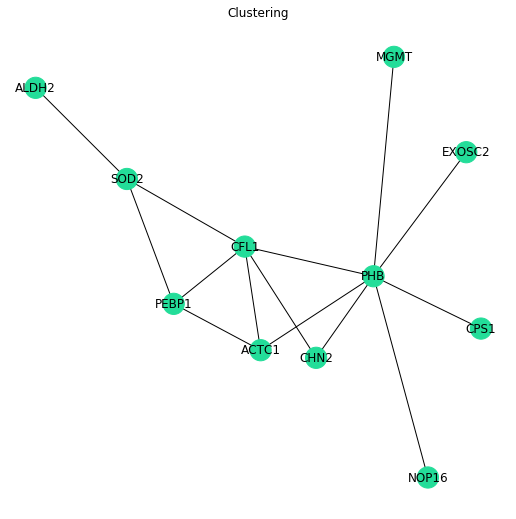

In [92]:
clusters=clustering(G)
Drawclustering(G,clusters,'Clustering')

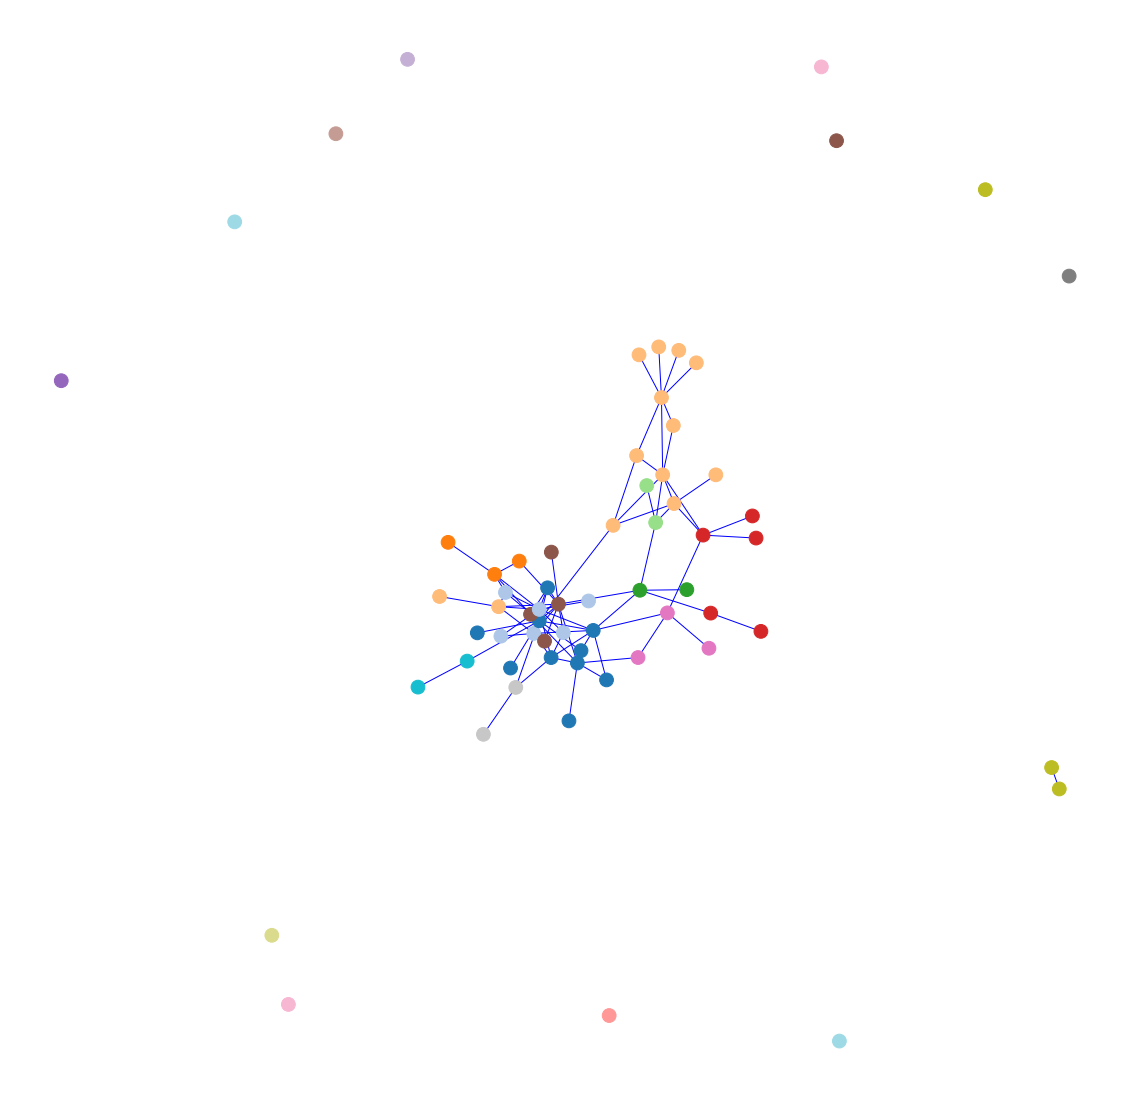

In [97]:
adj_matrix = nx.to_numpy_matrix(G)
res = m_cl.run_mcl(adj_matrix)
clusters = m_cl.get_clusters(res)

plt.figure(figsize=(20,20))

m_cl.draw_graph(adj_matrix, clusters, node_size=189, with_labels=False, edge_color="blue")


**Clustering for I network!**

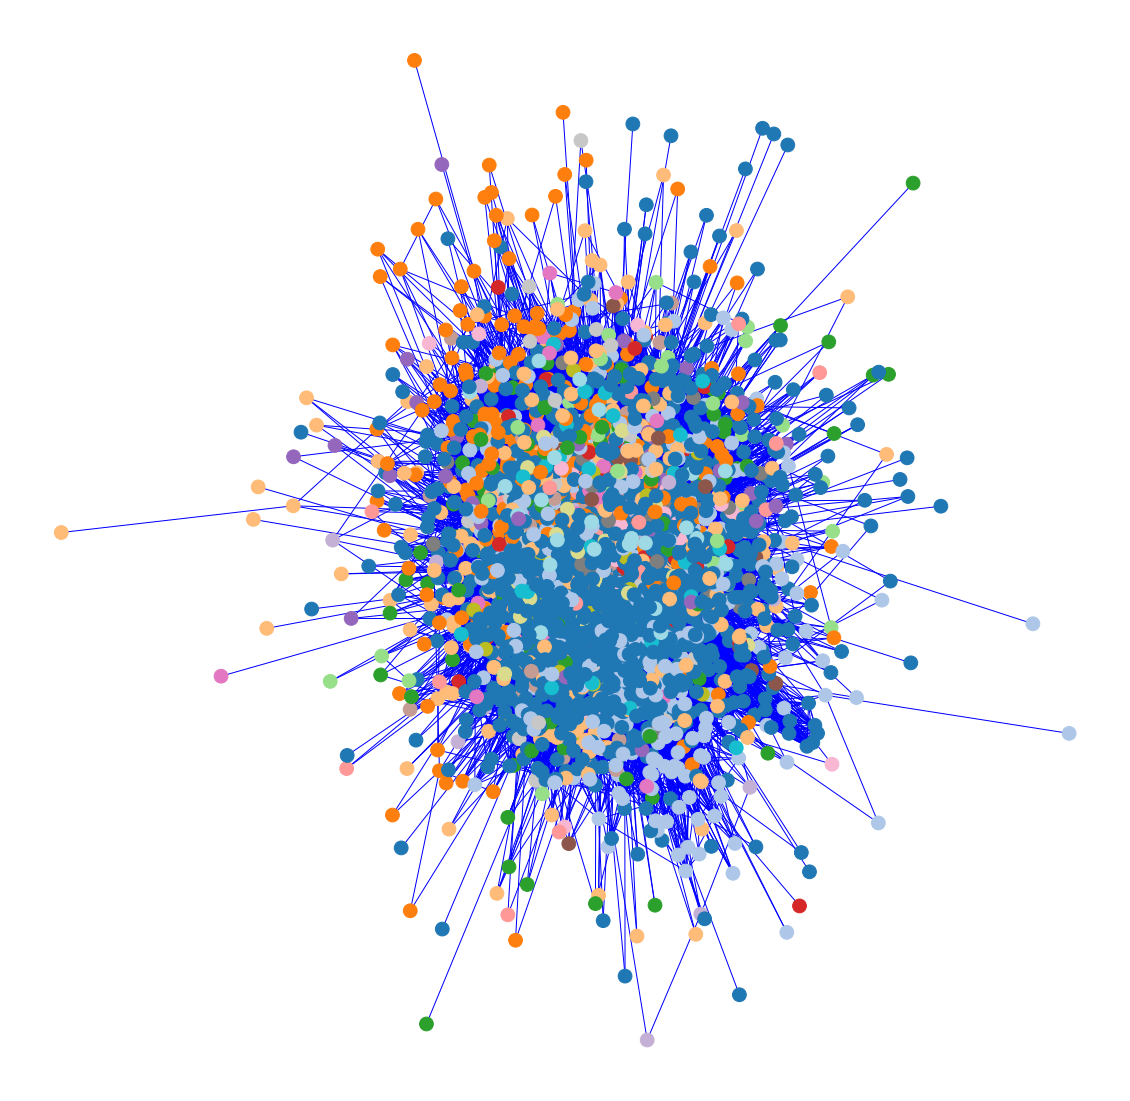

In [98]:
adj_matrix = nx.to_numpy_matrix(G_i)
res = m_cl.run_mcl(adj_matrix)
clusters = m_cl.get_clusters(res)

plt.figure(figsize=(20,20))

m_cl.draw_graph(adj_matrix, clusters, node_size=189, with_labels=False, edge_color="blue")
